# Introduction 

### DATASET OF CREDIT CARD DATA IS USED TO TRAIN,TEST AND ANALYSE FOR FRAUD ANOMALY DETECTION WITH RESPECTIVE MODELS. 

## Modules and libraries needed:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
import pickle


## DATA READING

In [2]:
#Reading the dataset by importing pandas as pd.

df = pd.read_csv('creditcard.csv')

In [3]:
#printing the 5 rows of the dataset with all columns.
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data preprocessing and Visualization

In [5]:
#printing the datatypes of all columns in dataset.
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#checking for null values in dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#dropping duplicate rows
df = df.drop_duplicates()


# EDA and Visualization

## Univariate analysis  (numerical columns as there are no categorical columns)

C:\Users\saiki\AppData\Local\Temp\ipykernel_11880\2877350541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


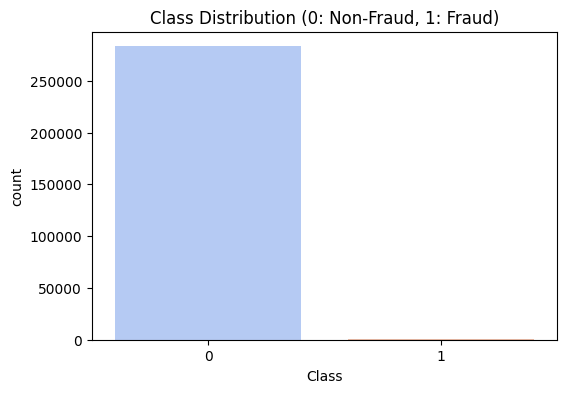

Class
0    283253
1       473
Name: count, dtype: int64


In [8]:
#Barchart for non-fraud and fraud count. 



plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.show()

fraud_percentage = df['Class'].value_counts() 
print(fraud_percentage)


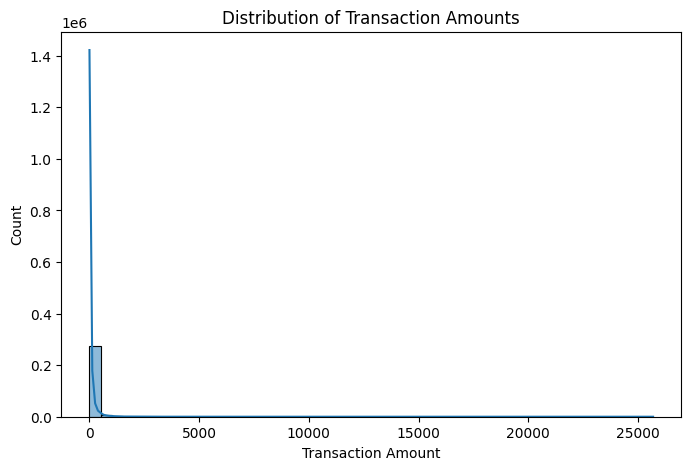

In [9]:
#visulaizing the distribution of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()


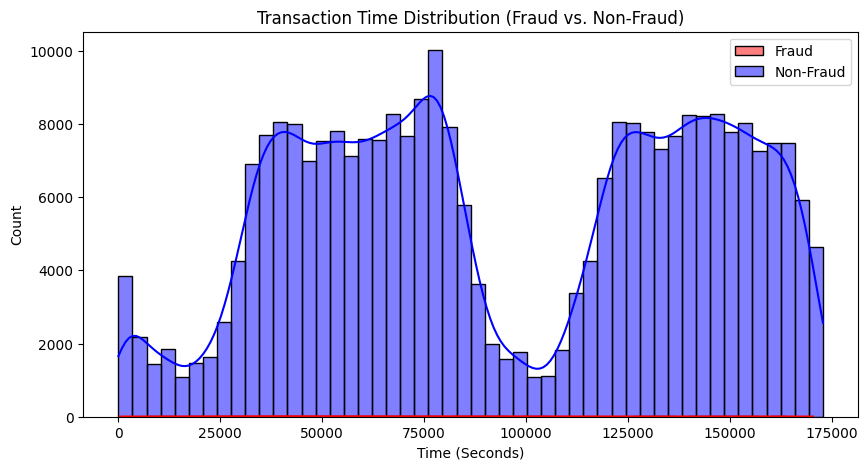

In [10]:
#visulaizing the transaction time distribution.

plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red', label="Fraud")
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label="Non-Fraud", alpha=0.5)
plt.legend()
plt.title("Transaction Time Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Time (Seconds)")
plt.show()


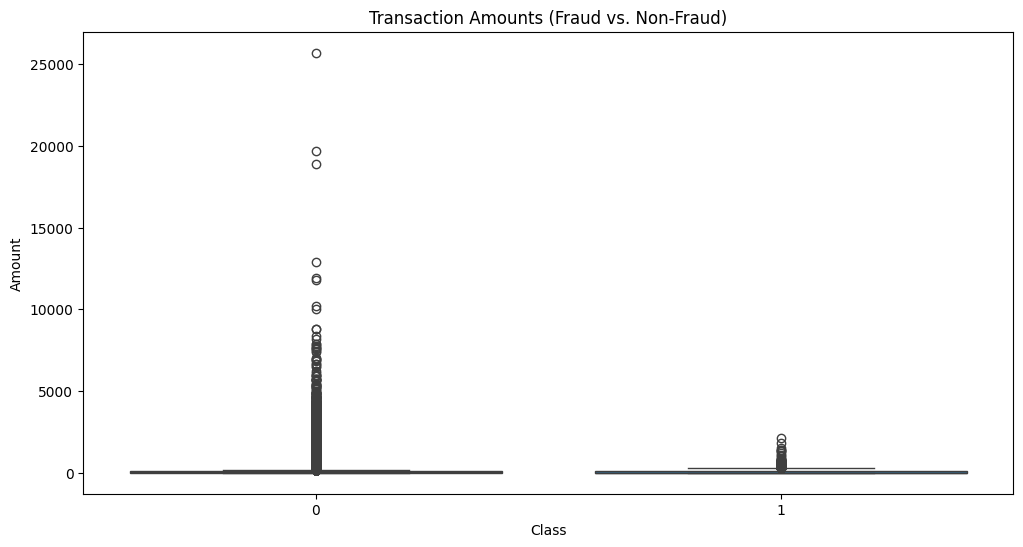

In [11]:
#box plot to check for outliers but these are necessary as a part of anomaly detection 
plt.figure(figsize=(12,6))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amounts (Fraud vs. Non-Fraud)")
plt.show()


## Bivariate Analysis

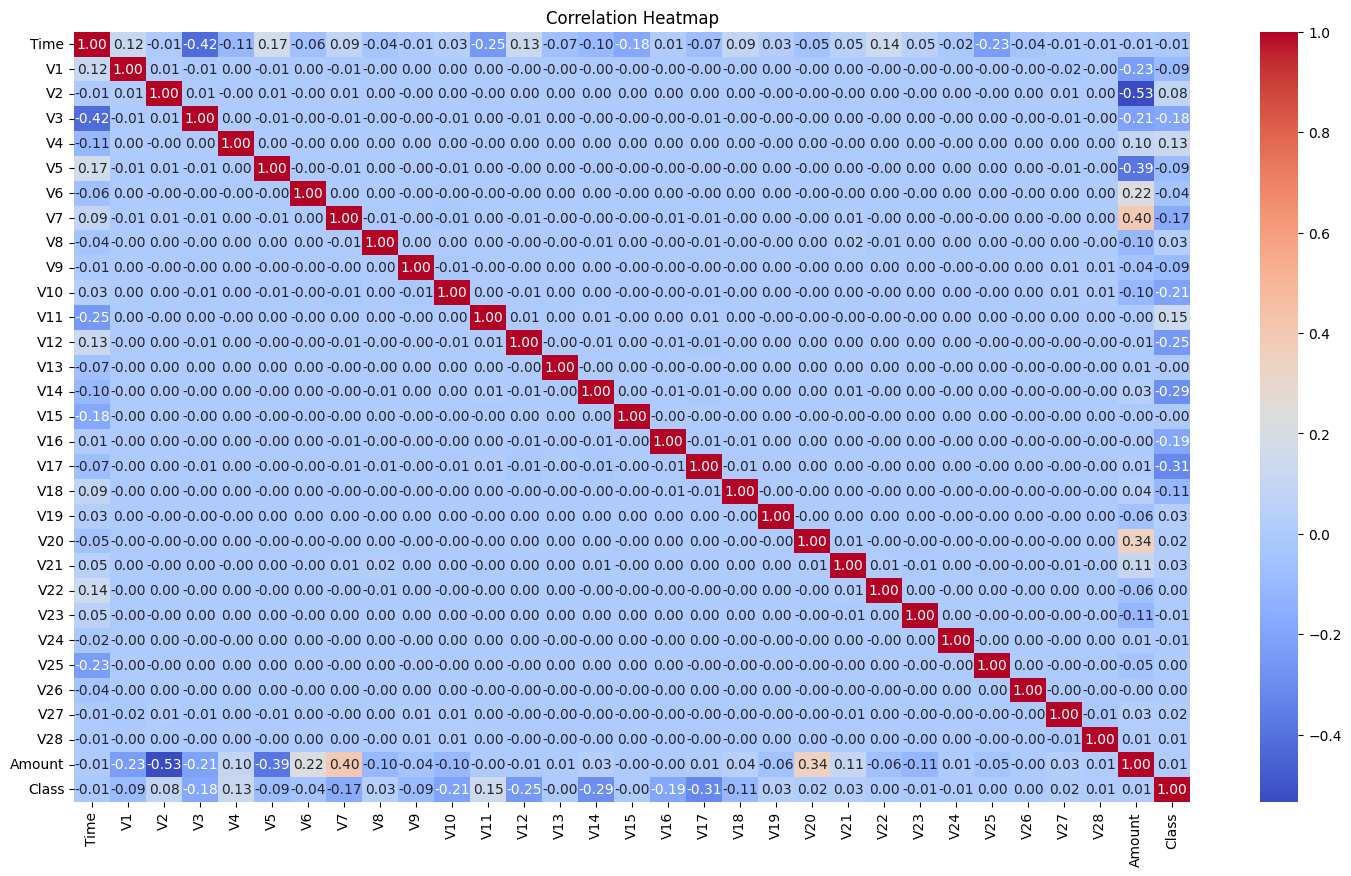

In [12]:
#heatmap
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


## Scaling and Normalization

In [13]:
#Standard scalar 

X = df.drop(columns=['Class'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Feature selection-correaltion


Top correlated features with the target variable ('Class'):
V17: -0.3135
V14: -0.2934
V12: -0.2507
V10: -0.2070
V16: -0.1872
V3: -0.1823
V7: -0.1723
V11: 0.1491
V4: 0.1293
V18: -0.1053
V1: -0.0945
V9: -0.0940
V5: -0.0878
V2: 0.0846
V6: -0.0439
V19: 0.0336
V8: 0.0331
V21: 0.0264
V27: 0.0219
V20: 0.0215
Time: -0.0124
V28: 0.0097
V24: -0.0072
V23: -0.0063
Amount: 0.0058
V22: 0.0049
V26: 0.0043
V13: -0.0039
V15: -0.0033
V25: 0.0032


C:\Users\saiki\AppData\Local\Temp\ipykernel_11880\263847998.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=correlation_values, palette="viridis")


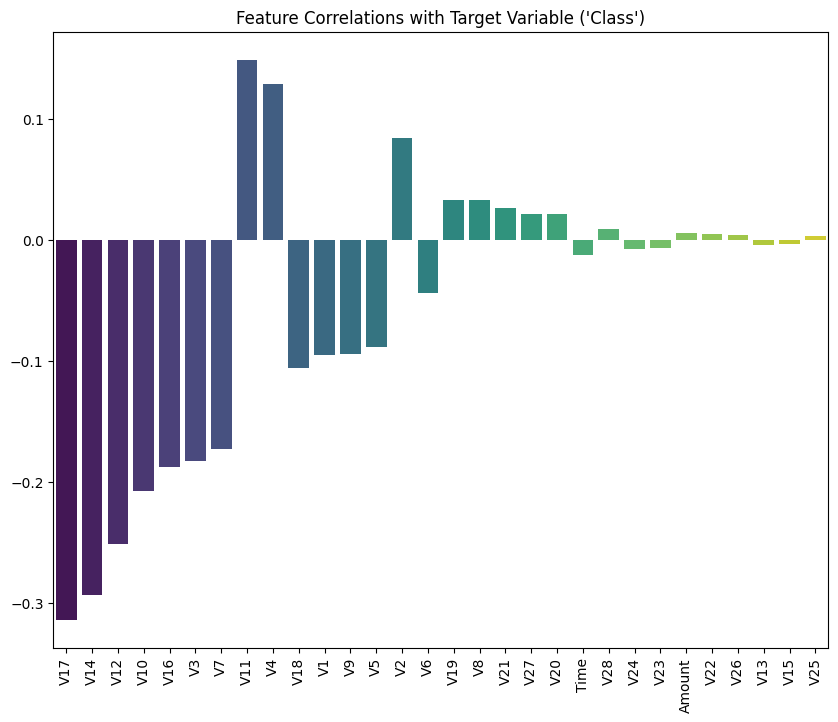

In [14]:
#No features has been removed as most of them are not correlated but shows minute impact due to fraud vs non-fraud data found in dataset
y = df['Class']

correlations = []
for i, col in enumerate(X.columns):
    correlation = np.corrcoef(X_scaled[:, i], y)[0, 1]
    correlations.append((col, correlation))

# Sort features by their correlation with the target
correlations = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# Display top correlated features
print("\nTop correlated features with the target variable ('Class'):")
for feature, corr in correlations:
    print(f"{feature}: {corr:.4f}")

# Plot the correlations with the target variable
features, correlation_values = zip(*correlations)
plt.figure(figsize=(10, 8))
sns.barplot(x=features, y=correlation_values, palette="viridis")
plt.title("Feature Correlations with Target Variable ('Class')")
plt.xticks(rotation=90)
plt.show()


## train-test split

In [15]:

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## MODELS

## ISOLATION FOREST 

In [17]:

# Isolation Forest
iso_forest = IsolationForest(contamination=len(df[df['Class'] == 1])/len(df[df['Class'] == 0]), random_state=42)

# Fit on the training data and predict on the test data
y_pred_iso_train = iso_forest.fit_predict(X_train)
y_pred_iso_test = iso_forest.predict(X_test)

# Convert predictions from -1 to 1 (anomaly) and 1 to 0 (normal)
y_pred_iso_train = [1 if x == -1 else 0 for x in y_pred_iso_train]
y_pred_iso_test = [1 if x == -1 else 0 for x in y_pred_iso_test]

# Count anomalies detected
train_anomalies_count = sum([1 for x in y_pred_iso_train if x == 1])
test_anomalies_count = sum([1 for x in y_pred_iso_test if x == 1])

print(f"Number of anomalies detected in training data: {train_anomalies_count}")
print(f"Number of anomalies detected in testing data: {test_anomalies_count}")

# Classification report 
print("Classification Report (Train Data):")
print(classification_report(y_train, y_pred_iso_train))

print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_iso_test))

Number of anomalies detected in training data: 380
Number of anomalies detected in testing data: 94
Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.23      0.23      0.23       383

    accuracy                           1.00    226980
   macro avg       0.61      0.61      0.61    226980
weighted avg       1.00      1.00      1.00    226980

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.20      0.21      0.21        90

    accuracy                           1.00     56746
   macro avg       0.60      0.60      0.60     56746
weighted avg       1.00      1.00      1.00     56746



## Oneclass SVM model


In [18]:
#Oneclass SVM model

one_class_svm = OneClassSVM(nu=0.01, kernel="rbf", gamma='scale')

# Fit on the training data and predict on both train and test sets
y_pred_svm_train = one_class_svm.fit_predict(X_train)
y_pred_svm_test = one_class_svm.predict(X_test)

# Convert predictions from -1 to 1 (anomaly) and 1 to 0 (normal)
y_pred_svm_train = [1 if x == -1 else 0 for x in y_pred_svm_train]
y_pred_svm_test = [1 if x == -1 else 0 for x in y_pred_svm_test]

# Count anomalies detected
train_anomalies_count = sum([1 for x in y_pred_svm_train if x == 1])
test_anomalies_count = sum([1 for x in y_pred_svm_test if x == 1])

print(f"Number of anomalies detected in training data: {train_anomalies_count}")
print(f"Number of anomalies detected in testing data: {test_anomalies_count}")

# Classification report
print("Classification Report (Train Data):")
print(classification_report(y_train, y_pred_svm_train))

print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_svm_test))


Number of anomalies detected in training data: 2340
Number of anomalies detected in testing data: 736
Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226597
           1       0.08      0.49      0.14       383

    accuracy                           0.99    226980
   macro avg       0.54      0.74      0.57    226980
weighted avg       1.00      0.99      0.99    226980

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.06      0.52      0.11        90

    accuracy                           0.99     56746
   macro avg       0.53      0.76      0.55     56746
weighted avg       1.00      0.99      0.99     56746



## LOCAL OUTLIER FACTOR model


In [19]:
#LOCAL OUTLIER FACTOR model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Fit on the training data and predict on both train and test sets
y_pred_lof_train = lof.fit_predict(X_train)
y_pred_lof_test = lof.fit_predict(X_test)

# Convert predictions from -1 to 1 (anomaly) and 1 to 0 (normal)
y_pred_lof_train = [1 if x == -1 else 0 for x in y_pred_lof_train]
y_pred_lof_test = [1 if x == -1 else 0 for x in y_pred_lof_test]

# Count anomalies detected
train_anomalies_count = sum([1 for x in y_pred_lof_train if x == 1])
test_anomalies_count = sum([1 for x in y_pred_lof_test if x == 1])

print(f"Number of anomalies detected in training data: {train_anomalies_count}")
print(f"Number of anomalies detected in testing data: {test_anomalies_count}")

# Classification report
print("Classification Report (Train Data):")
print(classification_report(y_train, y_pred_lof_train))

print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_lof_test))

Number of anomalies detected in training data: 2270
Number of anomalies detected in testing data: 568
Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226597
           1       0.00      0.02      0.01       383

    accuracy                           0.99    226980
   macro avg       0.50      0.50      0.50    226980
weighted avg       1.00      0.99      0.99    226980

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.01      0.06      0.02        90

    accuracy                           0.99     56746
   macro avg       0.50      0.52      0.50     56746
weighted avg       1.00      0.99      0.99     56746



## saving best model

In [20]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(iso_forest, file)